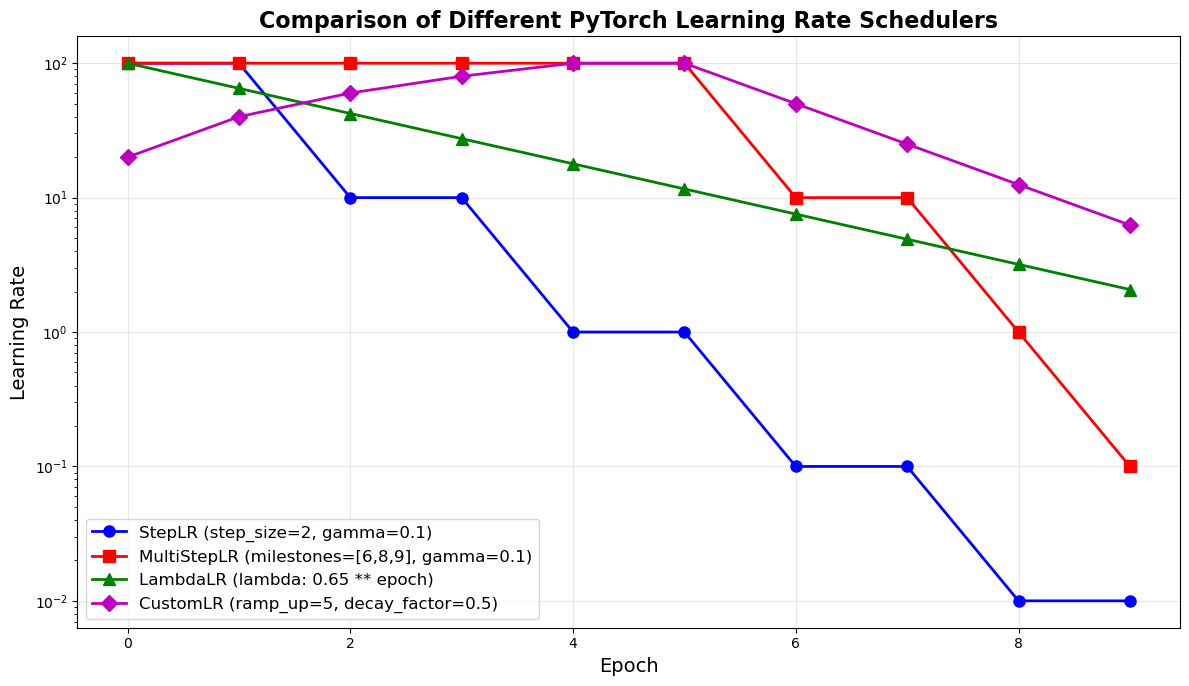

In [3]:
import torch
import matplotlib.pyplot as plt
import numpy as np

# Define the Custom LR Scheduler
class CustomLRScheduler(torch.optim.lr_scheduler._LRScheduler):
    def __init__(self, optimizer, base_lr=0.1, ramp_up_epochs=5, decay_factor=0.5, last_epoch=-1):
        self.base_lr = base_lr
        self.ramp_up_epochs = ramp_up_epochs
        self.decay_factor = decay_factor
        super(CustomLRScheduler, self).__init__(optimizer, last_epoch)
    
    def get_lr(self):
        # Custom rule for updating learning rate
        if self.last_epoch < self.ramp_up_epochs:
            # Linearly increase learning rate for the initial ramp_up_epochs
            return [self.base_lr * (self.last_epoch + 1) / self.ramp_up_epochs for _ in self.base_lrs]
        else:
            # Decay the learning rate by decay_factor for each subsequent epoch
            return [base_lr * (self.decay_factor ** (self.last_epoch - self.ramp_up_epochs)) for base_lr in self.base_lrs]

# Set up the figure 
plt.figure(figsize=(12, 8))

# StepLR Scheduler
model1 = torch.nn.Linear(2, 1)
optimizer1 = torch.optim.SGD(model1.parameters(), lr=100)
scheduler1 = torch.optim.lr_scheduler.StepLR(optimizer1, step_size=2, gamma=0.1)
lrs1 = []
for i in range(10):
    optimizer1.step()
    lrs1.append(optimizer1.param_groups[0]["lr"])
    scheduler1.step()

# MultiStepLR Scheduler
model2 = torch.nn.Linear(2, 1)
optimizer2 = torch.optim.SGD(model2.parameters(), lr=100)
scheduler2 = torch.optim.lr_scheduler.MultiStepLR(optimizer2, milestones=[6, 8, 9], gamma=0.1)
lrs2 = []
for i in range(10):
    optimizer2.step()
    lrs2.append(optimizer2.param_groups[0]["lr"])
    scheduler2.step()

# LambdaLR Scheduler
model3 = torch.nn.Linear(2, 1)
optimizer3 = torch.optim.SGD(model3.parameters(), lr=100)
lambda1 = lambda epoch: 0.65 ** epoch
scheduler3 = torch.optim.lr_scheduler.LambdaLR(optimizer3, lr_lambda=lambda1)
lrs3 = []
for i in range(10):
    optimizer3.step()
    lrs3.append(optimizer3.param_groups[0]["lr"])
    scheduler3.step()

# Custom LR Scheduler
model4 = torch.nn.Linear(2, 1)
optimizer4 = torch.optim.SGD(model4.parameters(), lr=100)
# Initialize with base_lr=100 to match other schedulers
scheduler4 = CustomLRScheduler(optimizer4, base_lr=100, ramp_up_epochs=5, decay_factor=0.5)
lrs4 = []
for i in range(10):
    optimizer4.step()
    lrs4.append(optimizer4.param_groups[0]["lr"])
    scheduler4.step()


# Plot all learning rate curves
plt.plot(range(10), lrs1, 'b-', marker='o', linewidth=2, markersize=8, label='StepLR (step_size=2, gamma=0.1)')
plt.plot(range(10), lrs2, 'r-', marker='s', linewidth=2, markersize=8, label='MultiStepLR (milestones=[6,8,9], gamma=0.1)')
plt.plot(range(10), lrs3, 'g-', marker='^', linewidth=2, markersize=8, label='LambdaLR (lambda: 0.65 ** epoch)')
plt.plot(range(10), lrs4, 'm-', marker='D', linewidth=2, markersize=8, label='CustomLR (ramp_up=5, decay_factor=0.5)')

# Add labels and title
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Learning Rate', fontsize=14)
plt.title('Comparison of Different PyTorch Learning Rate Schedulers', fontsize=16, fontweight='bold')
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.yscale('log')  # Log scale makes it easier to see all curves


# Show the plot
plt.tight_layout(rect=[0, 0.08, 1, 0.95])
plt.show()